# Project Candidate 1

## 1. Fourier Transformation

### import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tqdm import tqdm

# Allowed module : numpy, matplotlib, pandas, gurobi, scipy, seaborn

### utils

In [2]:
def imshow(image: np.ndarray, title: str, grayscale: bool = False):
    plt.title(title)
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

### Load the image. Convert to grayscale.

In [3]:
img = imread("./Boneyard_IMG_5341.jpg")

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397, 3)      # H × W × C


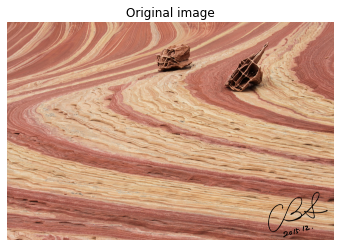

In [4]:
print(f"datatype : {type(img)}")
print(f"   shape : {img.shape}      # H × W × C")

imshow(img, "Original image")

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397)      # H × W


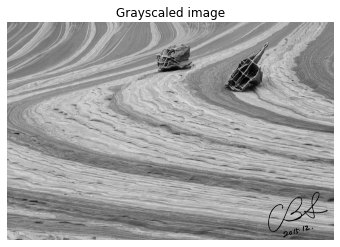

In [5]:
gimg = np.mean(img, axis=-1)

print(f"datatype : {type(gimg)}")
print(f"   shape : {gimg.shape}      # H × W")

imshow(gimg, "Grayscaled image", grayscale=True)

### Naive 2D DFT Implementation

- Complexity : $O(H^2 W^2) = O(N^2)$ where $N=HW$
- Desirable Complexity (complexity of FFT) : $O(N \log N)$

이 구현은 complexity 관점에서도 문제지만, 그것보다는 4중 for 문을 사용하여 전혀 병렬컴퓨팅 (vectorized operation in numpy) 이 안된다는 부분이 성능에 더 치명적임.

In [6]:
def dft2(image: np.ndarray) -> np.ndarray:
    W, H = image.shape
    out = np.zeros_like(image, dtype='complex_')
    for (w, h), _ in tqdm(np.ndenumerate(image)):
        val = 0
        for (ww, hh), pixel in np.ndenumerate(image):
            e = np.exp(-1j * 2 * np.pi * (w * ww / W + h * hh / H))
            val += pixel * e
        out[w][h] = val
    return out

def idft2(dft2_array: np.ndarray) -> np.ndarray:
    W, H = dft2_array.shape
    image = np.zeros_like(dft2_array, dtype='float64')
    for (w, h), _ in tqdm(np.ndenumerate(dft2_array)):
        pixel = 0
        for (ww, hh), val in np.ndenumerate(dft2_array):
            e = np.exp(1j * 2 * np.pi * (w * ww / W + h * hh / H))
            pixel += val * e
        image[w][h] = pixel.real
    image = image / W / H
    return image


### Validation of the Implementation

사진을 극히 일부만 잘라서 동작 시험해봄.
- dft2 : numpy 에 이미 구현된 fft2 method 와 동일한 결과 출력
- idft2 : dft2 의 변환된 결과로부터 원래 이미지와 동일한 결과를 복원해냄

dft2 가 넉넉잡아 100it/s 라 할때, 원본 이미지는 $3598 * 5397 \approx 3600 * 5400$ iterations 이므로, dft2 과정만 해도 총 **54시간** 걸릴 것으로 추정


In [7]:
cropped_gimg = gimg[25:75, 25:75]
cropped_gimg_dft = dft2(cropped_gimg)
restored_cropped_gimg = idft2(cropped_gimg_dft)

2500it [00:27, 89.89it/s]
2500it [00:10, 231.77it/s]


In [8]:
print(" dft precision :", abs((np.fft.fft2(cropped_gimg) - cropped_gimg_dft).max()))
print("idft precision :", abs((cropped_gimg - restored_cropped_gimg).max()))

 dft precision : 1.5873989562939521e-09
idft precision : 7.247535904753022e-12


### Compression using Fourier Transformation

In [9]:
# def fft_compression(grayscale_image: np.ndarray, compression_rate: float) -> np.ndarray:
#     # Fourier Transformation
#     gimg_fft = np.fft.fft2(grayscale_image)
#     # Compression
#     gimg_fft_sorted = np.sort(np.abs(gimg_fft.reshape(-1)))
#     threshold_idx = (1-compression_rate) * len(gimg_fft_sorted)
#     threshold_idx = int(np.floor(threshold_idx))
#     threshold = gimg_fft_sorted[threshold_idx]
#     compression_mask = np.abs(gimg_fft) > threshold
#     compressed_gimg_fft = gimg_fft * compression_mask
#     # Inverse Fourier Transformation
#     compressed_gimg_fft = gimg_fft * compression_mask
#     compressed_gimg = np.fft.ifft2(compressed_gimg_fft).real
#     return compressed_gimg

In [10]:
# compressed_gimg = fft_compression(grayscale_image=gimg, compression_rate=0.05)
# imshow(compressed_gimg, "Compressed grayscale image", True)

### Save the compressed image. Violate the module limitation.

In [11]:
# 잘 안되네...

# from PIL import Image
# Image.fromarray(compressed_gimg, mode='L').save("fft_compressed05.jpg")